In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neural_network import MLPRegressor
from vecstack import stacking, StackingTransformer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score
from sklearn import ensemble
import matplotlib.pylab as pyl
from sklearn.ensemble import VotingRegressor
import warnings

In [2]:
warnings.filterwarnings('ignore')
result={'estimator':[],'MSE':[],'R2':[]}
result

{'estimator': [], 'MSE': [], 'R2': []}

In [3]:
def model(estimator, X_train, Y_train, X_test, Y_test):
    model=estimator.fit(X_train, Y_train)
    print("Parameters of model :\n",model)
    predict = model.predict(X_test)
    print("Predict:\n", predict)
    train_acc = model.score(X_train, Y_train)
    print('Training data accuracy in model is:', train_acc)
    test_acc = model.score(X_test, Y_test)
    print('Test data accuracy in model is', test_acc)
    MSE = mean_squared_error(Y_test, predict)
    print('Mean squared error of test is :', MSE)
    result['MSE'].append(MSE)
    return predict

In [4]:
def plot_result(weights,data_columns ):
    weights = pd.Series(weights, index=data_columns)
    weights.nlargest(10).plot(kind='barh')
    plt.show()

In [5]:
def cv_result(estimator,dataX, dataY):
    r2 = cross_val_score(estimator, dataX, dataY, cv=10, scoring='r2')
    print("Accuracy: %0.2f (+/- %0.2f)" % (r2.mean(), r2.std() * 2))
    result['R2'].append(r2.mean())


In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=3, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                     alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")

    plt.legend(loc="best")

    plt.show()

In [7]:
dataset = pd.read_csv('predict_admission.csv')
pd.set_option('display.width',None)

In [8]:
print(dataset.head())
print(dataset.columns)
dataset = dataset.rename(columns={'Serial No.':'SerialNo', 'GRE Score':'GREScore', 'TOEFL Score':'TOEFLScore', 'University Rating':'UniversityRating','LOR ':'LOR','Chance of Admit':'ChanceOfAdmit'})
print(dataset.info())
print(dataset.describe(include='all'))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S

In [9]:
data_train=dataset.drop('SerialNo',axis=1)
data_train = data_train.drop('ChanceOfAdmit', axis=1)
#dataX = dataX.drop('Research', axis=1)
dataY = dataset['ChanceOfAdmit']
print(dataset.corr())
print(type(data_train))

                  SerialNo  GREScore  TOEFLScore  UniversityRating       SOP  \
SerialNo          1.000000 -0.103839   -0.141696         -0.067641 -0.137352   
GREScore         -0.103839  1.000000    0.827200          0.635376  0.613498   
TOEFLScore       -0.141696  0.827200    1.000000          0.649799  0.644410   
UniversityRating -0.067641  0.635376    0.649799          1.000000  0.728024   
SOP              -0.137352  0.613498    0.644410          0.728024  1.000000   
LOR              -0.003694  0.524679    0.541563          0.608651  0.663707   
CGPA             -0.074289  0.825878    0.810574          0.705254  0.712154   
Research         -0.005332  0.563398    0.467012          0.427047  0.408116   
ChanceOfAdmit     0.008505  0.810351    0.792228          0.690132  0.684137   

                       LOR      CGPA  Research  ChanceOfAdmit  
SerialNo         -0.003694 -0.074289 -0.005332       0.008505  
GREScore          0.524679  0.825878  0.563398       0.810351  
TOEFLSc

In [10]:
sc=MinMaxScaler()
sc.fit(data_train)
dataX=sc.transform(data_train)
dataX=pd.DataFrame(dataX,columns=data_train.columns)
print(type(dataX))
print(dataX.head())


<class 'pandas.core.frame.DataFrame'>
   GREScore  TOEFLScore  UniversityRating    SOP    LOR      CGPA  Research
0      0.94    0.928571              0.75  0.875  0.875  0.913462       1.0
1      0.68    0.535714              0.75  0.750  0.875  0.663462       1.0
2      0.52    0.428571              0.50  0.500  0.625  0.384615       1.0
3      0.64    0.642857              0.50  0.625  0.375  0.599359       1.0
4      0.48    0.392857              0.25  0.250  0.500  0.451923       0.0


In [11]:
threshold=0.73
class_dataY = np.where(dataY>threshold,1,0)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42)

In [13]:
class_y_train = np.where(y_train>threshold,1,0)
class_y_test = np.where(y_test>threshold,1,0)
print("***************LinearRegression****************")

***************LinearRegression****************


Parameters of model :
 LinearRegression()
Predict:
 [0.91457473 0.79518127 0.57265986 0.70736968 0.81588282 0.86206561
 0.47459746 0.64850923 0.82378728 0.80741498 0.72193204 0.72589118
 0.65632227 0.93677168 0.8241518  0.50979177 0.83931942 0.59727295
 0.53339576 0.57155958 0.66548168 0.55305833 0.72232308 0.79506004
 0.78027648 0.60248654 0.94840363 0.84741471 0.62777011 0.74343096
 0.55533035 0.73004034 0.54474225 0.86116288 0.65713016 0.7371816
 0.55423839 0.95718977 0.64364267 0.71057279 0.97036982 0.57495143
 0.67075391 0.85830422 0.94112903 0.57793762 0.9583926  0.83902765
 0.79591651 0.92570648 0.88805969 0.56366238 0.70359711 0.52658929
 0.9536427  0.59746814 0.95600396 0.73916386 0.66256982 0.5012903
 0.62950759 0.68031188 0.59896721 0.59203806 0.44085868 0.58866369
 0.8667547  0.89783006 0.65831807 0.70667392 0.6176818  0.78587721
 0.69152566 0.56271019 0.5542953  0.65084583 0.84627224 0.86373777
 0.53729574 0.63142139 0.76958036 0.84812916 0.61693172 0.8471071
 0.73411583 0

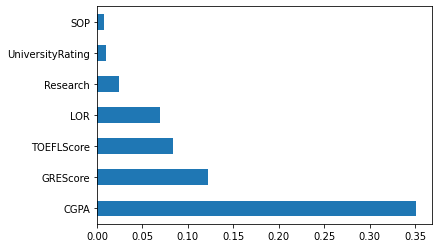

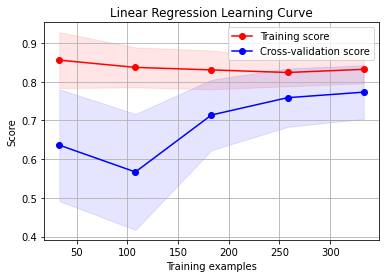

In [14]:
estimator= LinearRegression()
predict=model(estimator, x_train, y_train, x_test, y_test)
cv_result(estimator,dataX, dataY)
plot_result(estimator.coef_, data_train.columns)
plot_learning_curve(estimator, "Linear Regression Learning Curve", dataX, dataY)
result['estimator'].append('LR')

***************RidgeRegression****************
Parameters of model :
 Ridge(alpha=0.1, random_state=2)
Predict:
 [0.9136212  0.79466226 0.57397275 0.70666216 0.81524893 0.86173946
 0.47447825 0.64787864 0.82237038 0.80734767 0.72198672 0.72532195
 0.65778955 0.93678043 0.82286402 0.50928509 0.83972597 0.59698783
 0.53303596 0.57258185 0.66589631 0.55392455 0.72219467 0.79518807
 0.78038984 0.60235785 0.94812972 0.847426   0.627955   0.7438441
 0.5560422  0.7292964  0.54530406 0.86062826 0.65840871 0.7373343
 0.55335878 0.9568363  0.64432228 0.71070246 0.96949359 0.57530126
 0.67032782 0.85842569 0.94041005 0.57714552 0.95769591 0.83914163
 0.7964123  0.92547316 0.88741535 0.56400071 0.70387285 0.52746856
 0.95354313 0.59938238 0.95451886 0.73880378 0.66186655 0.50212677
 0.62832711 0.67991647 0.59830206 0.59400408 0.4410068  0.59062987
 0.86638844 0.89768245 0.65780898 0.70573315 0.61786316 0.78598542
 0.69039151 0.56399895 0.55312791 0.65013804 0.84619154 0.8638066
 0.53791475 0.63130

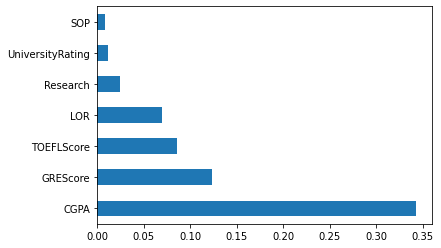

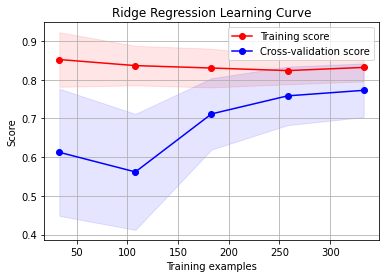

In [15]:
print("***************RidgeRegression****************")
estimator= Ridge(alpha=0.1, random_state=2)
predict=model(estimator, x_train, y_train, x_test, y_test)
cv_result(estimator,dataX, dataY)
plot_result(estimator.coef_, data_train.columns)
plot_learning_curve(estimator, "Ridge Regression Learning Curve", dataX, dataY)


In [16]:
param_grid={'alpha':np.arange(0.1, 1, 0.2)}
gs = GridSearchCV(estimator, param_grid, cv=10, scoring='r2')
gs.fit(x_train, y_train)
print('best parameters are:', gs.best_params_)
print('best score is:', gs.best_score_)

result['estimator'].append('Ridge')

best parameters are: {'alpha': 0.1}
best score is: 0.8050720580637464


In [17]:
print("***************MLPRegression****************")
estimator = MLPRegressor(hidden_layer_sizes=(8,), activation='tanh',solver='lbfgs',random_state=3)
predict=model(estimator, x_train, y_train, x_test, y_test)
cv_result(estimator,dataX, dataY)
result['estimator'].append('MLP')

***************MLPRegression****************
Parameters of model :
 MLPRegressor(activation='tanh', hidden_layer_sizes=(8,), random_state=3,
             solver='lbfgs')
Predict:
 [0.90219948 0.80767157 0.57823518 0.71187935 0.81567749 0.86462636
 0.49290297 0.64523722 0.82332354 0.816441   0.71907787 0.72819286
 0.65587086 0.92321556 0.82307922 0.50891779 0.85300729 0.57570067
 0.54137954 0.55854685 0.66866889 0.52435167 0.72280962 0.79180217
 0.78097565 0.58230214 0.94454029 0.8552367  0.63566941 0.7549305
 0.53179564 0.73159571 0.54710796 0.86526948 0.6576531  0.74226459
 0.57641744 0.95151946 0.63684213 0.71095445 0.93031063 0.54916993
 0.66826002 0.8631931  0.92183942 0.57764315 0.93108013 0.84249638
 0.80174819 0.93082494 0.90141375 0.56231334 0.70084095 0.53976866
 0.93958842 0.58940575 0.92537807 0.74106853 0.66291111 0.44420962
 0.61326418 0.6810892  0.6095814  0.55632422 0.44266703 0.59007229
 0.87196191 0.89952219 0.65968116 0.70401156 0.60615406 0.78665047
 0.6890255  0.566

In [18]:
param_grid={'hidden_layer_sizes':np.arange(1,10)}
gs = GridSearchCV(estimator, param_grid, cv=10, scoring='r2')
gs.fit(x_train, y_train)
print('best parameters are:', gs.best_params_)
print('best score is:', gs.best_score_)


best parameters are: {'hidden_layer_sizes': 8}
best score is: 0.8070121705740403


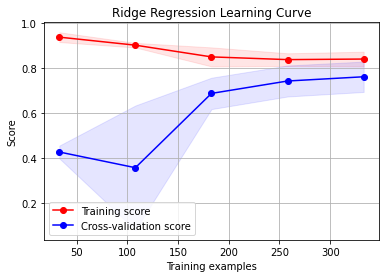

In [19]:
plot_learning_curve(estimator, "Ridge Regression Learning Curve", dataX, dataY)


***************RandomForestRegression****************
Parameters of model :
 RandomForestRegressor(criterion='mse', n_estimators=20)
Predict:
 [0.9375 0.7945 0.6015 0.704  0.7855 0.88   0.4895 0.6315 0.8545 0.7855
 0.72   0.723  0.6735 0.923  0.8525 0.5445 0.8185 0.6235 0.547  0.5515
 0.6345 0.5205 0.706  0.7555 0.7565 0.6225 0.9375 0.8305 0.6715 0.7395
 0.5785 0.746  0.552  0.878  0.644  0.7455 0.6045 0.9395 0.638  0.6895
 0.954  0.5575 0.7175 0.82   0.933  0.6155 0.9425 0.806  0.73   0.9305
 0.8995 0.5445 0.657  0.4535 0.943  0.6315 0.9575 0.7455 0.649  0.4195
 0.618  0.685  0.618  0.502  0.4485 0.5615 0.894  0.904  0.721  0.7145
 0.619  0.722  0.729  0.5875 0.5915 0.588  0.8325 0.873  0.533  0.68
 0.6965 0.879  0.61   0.8415 0.7245 0.6595 0.6265 0.754  0.7275 0.7025
 0.763  0.93   0.918  0.693  0.7625 0.4435 0.7015 0.7195 0.735  0.6885]
Training data accuracy in model is: 0.9641624271570554
Test data accuracy in model is 0.7829009779951102
Mean squared error of test is : 0.004439674

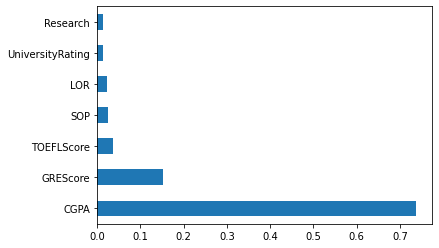

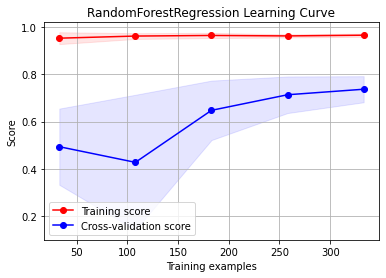

In [20]:
print("***************RandomForestRegression****************")
estimator = RandomForestRegressor(n_estimators=20,criterion='mse')
predict=model(estimator, x_train, y_train, x_test, y_test)
cv_result(estimator,dataX, dataY)
print(estimator.feature_importances_)
plot_result(estimator.feature_importances_, data_train.columns)
result['estimator'].append('RF')
plot_learning_curve(estimator, "RandomForestRegression Learning Curve", dataX, dataY)

In [21]:
print("***************Stacking****************")
models = [LinearRegression(),MLPRegressor(hidden_layer_sizes=(8,), activation='tanh',solver='lbfgs'),
          Ridge(alpha=0.1),RandomForestRegressor(n_estimators=20),GradientBoostingRegressor(n_estimators=20),AdaBoostRegressor(Ridge(alpha=0.1))]
S_train, S_test = stacking(models, x_train, y_train, x_test, regression=True, verbose=2,shuffle=True)
estimator = Ridge(alpha=0.1)
S_predict=model(estimator, S_train, y_train, S_test, y_test)
S = np.concatenate((S_train,S_test),axis=0)
r2 = r2_score(y_test, S_predict, multioutput='variance_weighted')
result['R2'].append(r2.mean())
result['estimator'].append('ST')


***************Stacking****************
task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [LinearRegression]
    fold  0:  [0.03615224]
    fold  1:  [0.04011942]
    fold  2:  [0.05256911]
    fold  3:  [0.04396554]
    ----
    MEAN:     [0.04320158] + [0.00607304]
    FULL:     [0.04320158]

model  1:     [MLPRegressor]
    fold  0:  [0.03742915]
    fold  1:  [0.04151883]
    fold  2:  [0.05095539]
    fold  3:  [0.04352939]
    ----
    MEAN:     [0.04335819] + [0.00490621]
    FULL:     [0.04335819]

model  2:     [Ridge]
    fold  0:  [0.03597265]
    fold  1:  [0.04005944]
    fold  2:  [0.05246791]
    fold  3:  [0.04403933]
    ----
    MEAN:     [0.04313483] + [0.00609671]
    FULL:     [0.04313483]

model  3:     [RandomForestRegressor]
    fold  0:  [0.04068000]
    fold  1:  [0.04687000]
    fold  2:  [0.05174000]
    fold  3:  [0.04689000]
    ----
    MEAN:     [0.04654500] + [0.00392463]
    FUL

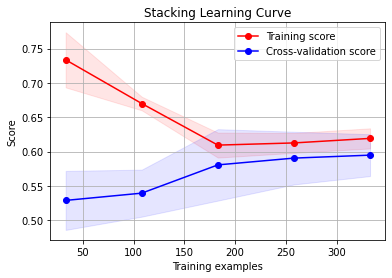

In [22]:
plot_learning_curve(estimator, "Stacking Learning Curve", dataX, class_dataY)

In [23]:
result=pd.DataFrame(result, columns=['estimator','MSE','R2'])
print(result)

  estimator       MSE        R2
0        LR  0.003705  0.813122
1     Ridge  0.003710  0.813112
2       MLP  0.003800  0.812415
3        RF  0.004440  0.773984
4        ST  0.003677  0.820217


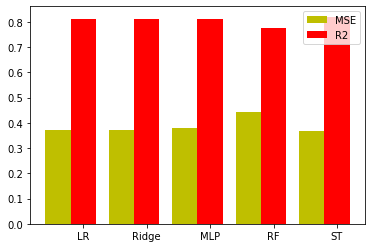

In [24]:
label_x = result['estimator']
num_x1 = result['MSE']*100
num_x2 = result['R2']
x = list(range(len(label_x)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(label_x, num_x1, width=width, label='MSE',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_x2, width=width, label='R2',tick_label = label_x,fc = 'r')
plt.legend()
plt.show()